# **PROJECT:NLP Resume Classification**

#Business objective
##The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.


In [1]:
!pip install nltk

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.6 MB/s eta 0:00:00


## **IMPORT THE LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import spacy
from spacy import displacy
from collections import Counter
nltk.download('punkt')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
import warnings
warnings.filterwarnings("ignore")

# **EDA**
#Read and Pre-process the data

In [4]:
data=pd.read_csv("/content/resume_data.csv")

In [5]:
data

,Resume,profiles
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
2,Classification: Internal\n\nClassification: In...,PeopleSoft
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
8,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft


In [6]:
#data[data.profiles == 'Workday']['profiles'].value_counts()

## Data Dimensions

In [7]:
data.shape

(50, 2)

##Data types

In [8]:
data.dtypes

Resume      object
profiles    object
dtype: object

##Value Counts

In [9]:
value_counts = data['profiles'].value_counts()
value_counts

profiles
React JS Developer    18
SQL Developer         11
Workday               11
PeopleSoft            10
Name: count, dtype: int64

##Bar plot of value counts of each category

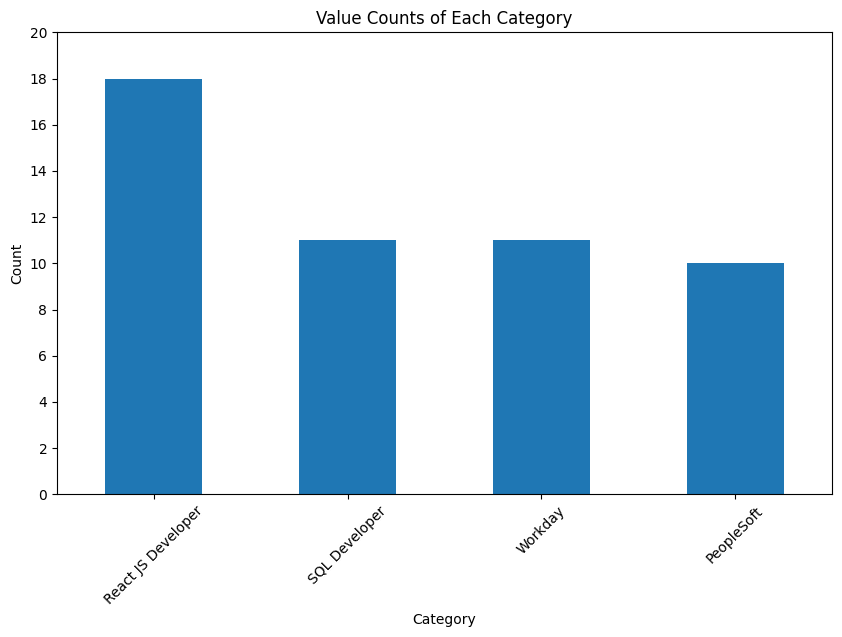

In [10]:
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')
plt.title('Value Counts of Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(0, 20)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

##Word Counts

In [11]:
data['Word_Count'] = data['Resume'].apply(lambda x: len(str(x).split(" ")))
data[['Resume','Word_Count']]

,Resume,Word_Count
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,448
2,Classification: Internal\n\nClassification: In...,558
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356
8,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363


##Stopwords Count

In [12]:
stop = stopwords.words('english')
data['Stopwords'] = data['Resume'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Resume','Stopwords']]

,Resume,Stopwords
0,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,136
1,Hari Narayana \t\t \n\n\t\n\n\n\n...,88
2,Classification: Internal\n\nClassification: In...,114
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
4,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,84
5,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
6,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
7,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42
8,PeopleSoft Administration\n\n \n\nVivekanand S...,520
9,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98


#**Preprocessing**

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in filtered_words]  # Lemmatize verbs
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in lemmatized_words]  # Lemmatize nouns

    return " ".join(filtered_words)

 ## This function preprocesses the text by converting it to lowercase, removing HTML tags, URLs, numbers, and stopwords, tokenizing the text, and finally performing lemmatization on the remaining tokens.clean and normalized text data can lead to better model performance in NLP tasks

In [15]:
data['Resumes'] = data.Resume.apply(lambda x: preprocess(x))

In [16]:
data.drop(["Resume","Word_Count",	"Stopwords"], axis = 1, inplace = True)

In [17]:
data

,profiles,Resumes
0,PeopleSoft,priyabrata hota career objective pursuing peop...
1,PeopleSoft,hari narayana professional summary years exper...
2,PeopleSoft,classification internal classification interna...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,murali professional summary years experience p...
5,PeopleSoft,anubhav kumar singh core competencies scriptin...
6,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
7,PeopleSoft,address manyata tech park nagavara bangalore l...
8,PeopleSoft,peoplesoft administration vivekanand sayana ca...
9,PeopleSoft,tanna sujatha objective seeking challenging ro...


#Tokenization and Frequency distribution

In [18]:
# Converting DataFrame to a string
data1 = data.to_string()

In [19]:
tokens = word_tokenize(data1)
tokens

['profiles',
 'Resumes',
 '0',
 'PeopleSoft',
 'priyabrata',
 'hota',
 'career',
 'objective',
 'pursuing',
 'peoplesoft',
 'executive',
 'role',
 'overall',
 'experience',
 'years',
 'financial',
 'supply',
 'chain',
 'management',
 'processes',
 'include',
 'modification',
 'testing',
 'supporting',
 'peoplesoft',
 'fscm',
 'modules',
 'professional',
 'skill',
 'functional',
 'purchasing',
 'inventory',
 'billing',
 'sound',
 'knowledge',
 'account',
 'payable',
 'sound',
 'knowledge',
 'peoplesoft',
 'security',
 'technical',
 'query',
 'basic',
 'knowledge',
 'peoplesoft',
 'security',
 'application',
 'designer',
 'peoplecode',
 'sql',
 'tools',
 'people',
 'tools',
 'oracle',
 'sql',
 'developer',
 'database',
 'oracle',
 'professional',
 'summary',
 'project',
 'module',
 'accounts',
 'payables',
 'client',
 'accounts',
 'team',
 'aptara',
 'role',
 'developer',
 'technologies',
 'used',
 'crystal',
 'reports',
 'people',
 'tools',
 'application',
 'designer',
 'reporting',
 't

Tokenization segments a text into smaller units there by it becomes possible to analyze the relationships between words, identify patterns, and extract meaningful information from the text.

In [20]:
# Word Frequency Analysis
fdist = FreqDist(tokens)
most_common=fdist.most_common(25)
words, frequencies = zip(*most_common)

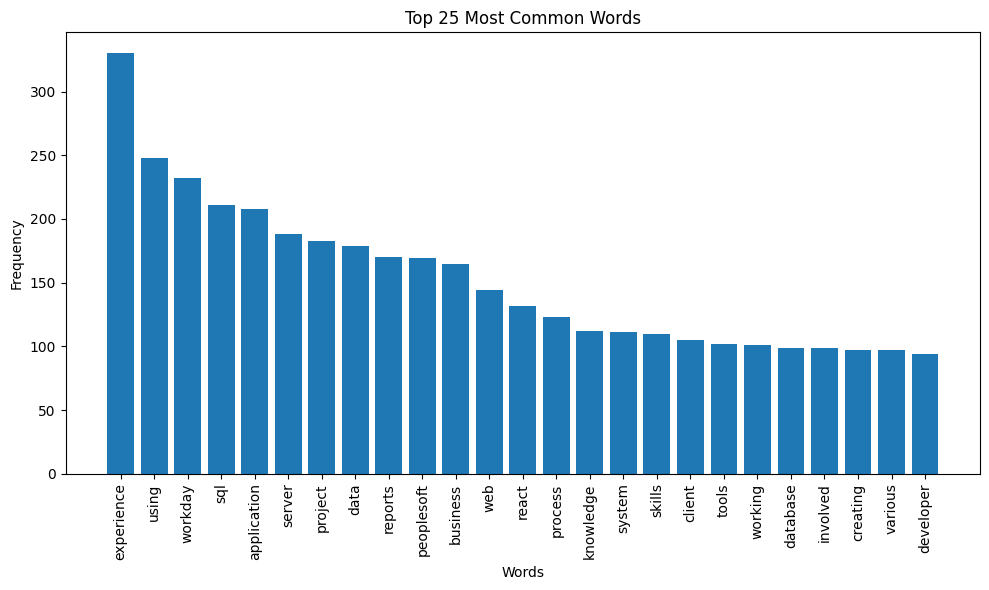

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.title('Top 25 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The frequency of each token in the list tokens is calculated using FreqDist from NLTK.

The 25 most common tokens along with their frequencies are extracted and
a bar chart is created using matplotlib to visualize the top 25 most common words and their frequencies.

##Word Cloud

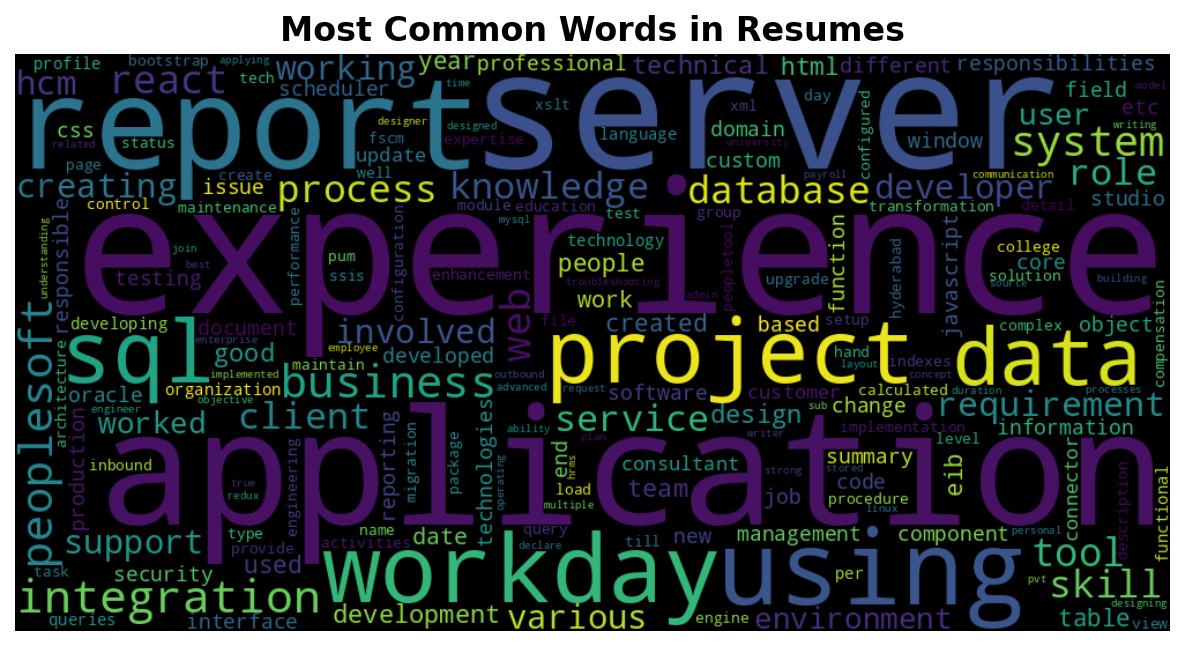

In [22]:
text = " ".join(word for word in data.Resumes)
word_cloud = WordCloud(width=1000, height=500, random_state=10, background_color="black", collocations=False).generate(text)
plt.figure(figsize=(10, 5),dpi=150)
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Most Common Words in Resumes', fontsize=16, fontweight='bold')
plt.axis("off")
plt.show()


##This word cloud visualizes the most common words found in the resumes, with each word's size indicating its frequency in the text data.

#Parts Of Speech (POS)

In [23]:
data2=data.copy()

In [24]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags
data2["POS"] = data2["Resumes"].apply(pos_tagging)
data2.head()


,profiles,Resumes,POS
0,PeopleSoft,priyabrata hota career objective pursuing peop...,"[(priyabrata, NOUN), (hota, VERB), (career, NO..."
1,PeopleSoft,hari narayana professional summary years exper...,"[(hari, PROPN), (narayana, PROPN), (profession..."
2,PeopleSoft,classification internal classification interna...,"[(classification, NOUN), (internal, ADJ), (cla..."
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,"[(sirazuddin, PROPN), (bangalore, PROPN), (ind..."
4,PeopleSoft,murali professional summary years experience p...,"[(murali, ADJ), (professional, ADJ), (summary,..."


 ### POS tagging on the text data in the "Resumes" column providies insight into the grammatical structure of the resumes by assigning POS tags to individual words (such as noun, verb, adjective, etc.)

In [25]:
data2["POS"].iloc[3]

[('sirazuddin', 'PROPN'),
 ('bangalore', 'PROPN'),
 ('india', 'PROPN'),
 ('sirazuddin', 'PROPN'),
 ('bangalore', 'PROPN'),
 ('india', 'PROPN'),
 ('profile', 'NOUN'),
 ('summary', 'NOUN'),
 ('overall', 'ADJ'),
 ('years', 'NOUN'),
 ('experience', 'PROPN'),
 ('peoplesoft', 'PROPN'),
 ('administrator', 'PROPN'),
 ('installed', 'VERB'),
 ('peopletools', 'NOUN'),
 ('scratch', 'NOUN'),
 ('including', 'VERB'),
 ('products', 'NOUN'),
 ('experience', 'NOUN'),
 ('peopletools', 'NOUN'),
 ('application', 'NOUN'),
 ('hrms', 'VERB'),
 ('fscm', 'PROPN'),
 ('deterministic', 'ADJ'),
 ('approach', 'NOUN'),
 ('towards', 'ADP'),
 ('problem', 'NOUN'),
 ('solving', 'VERB'),
 ('troubleshooting', 'NOUN'),
 ('proficient', 'ADJ'),
 ('integration', 'NOUN'),
 ('broker', 'NOUN'),
 ('upgraded', 'VERB'),
 ('fscm', 'PROPN'),
 ('hcm', 'PROPN'),
 ('applications', 'NOUN'),
 ('peopletools', 'PROPN'),
 ('peopletools', 'NOUN'),
 ('education', 'NOUN'),
 ('graduated', 'VERB'),
 ('tech', 'NOUN'),
 ('electronics', 'NOUN'),
 ('c

#Named Entity Recognition (NER)

In [26]:
nlp = spacy.load('en_core_web_sm')
def visualize_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
    colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)", "PERSON": "linear-gradient(90deg, #9cfca1, #9cd3fc)", "GPE": "linear-gradient(90deg, #fca19c, #fcfc9c)"}
    options = {"ents": [ent[3] for ent in entities], "colors": colors}
    displacy.render(doc, style='ent', options=options, jupyter=True)
visualize_ner(data2["Resumes"].iloc[7])  # Visualize NER for the resume

###NER involves identifying and classifying named entities in text into predefined categories such as persons, organizations, locations, dates, and more. It's a fundamental task for extracting structured information from unstructured text data.

##POS (Nouns and its Count)

In [27]:
from collections import Counter
nlp = spacy.load('en_core_web_sm')
# Function to extract noun counts from POS-tagged data
def extract_noun_counts(pos_tags):
    noun_counts = Counter([token[0] for token in pos_tags if token[1] == 'NOUN'])
    return noun_counts
data2["noun_counts"] = data2["POS"].apply(extract_noun_counts)

# Combine noun counts from all resumes
total_noun_counts = Counter()
for counts in data2["noun_counts"]:
    total_noun_counts += counts
noun_df = pd.DataFrame(list(total_noun_counts.items()), columns=['Noun', 'Count'])

# Sort noun counts in descending order
noun_df = noun_df.sort_values(by='Count', ascending=False)
noun_df.head(10)

,Noun,Count
4,experience,260
20,application,208
133,server,183
115,data,164
144,business,161
28,project,157
37,reports,151
183,web,139
51,process,119
135,system,107


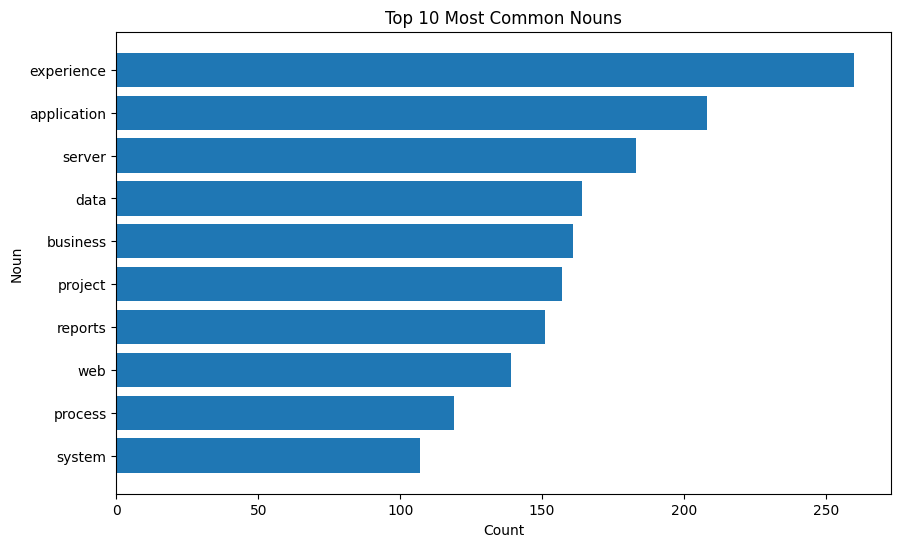

In [28]:
# Visualize the nouns and their counts
plt.figure(figsize=(10, 6))
plt.barh(noun_df['Noun'][:10], noun_df['Count'][:10])
plt.xlabel('Count')
plt.ylabel('Noun')
plt.title('Top 10 Most Common Nouns')
plt.gca().invert_yaxis()
plt.show()

##N-grams

In [29]:
from textblob import TextBlob
TextBlob(data['Resumes'][6]).ngrams(2)[:20]

[WordList(['peoplesoft', 'admin']),
 WordList(['admin', 'varkala']),
 WordList(['varkala', 'vikas']),
 WordList(['vikas', 'career']),
 WordList(['career', 'objective']),
 WordList(['objective', 'total']),
 WordList(['total', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'peoplesoft']),
 WordList(['peoplesoft', 'admin']),
 WordList(['admin', 'peoplesoft']),
 WordList(['peoplesoft', 'dba']),
 WordList(['dba', 'hope']),
 WordList(['hope', 'enhance']),
 WordList(['enhance', 'skill']),
 WordList(['skill', 'set']),
 WordList(['set', 'adding']),
 WordList(['adding', 'value']),
 WordList(['value', 'business']),
 WordList(['business', 'enable'])]

##N-gram is a sequence of n consecutive items extracted from a text or speech corpus. This is an n-gram of 2 consecutive words extracted from a resume of index 6

#**Feature Engineering**



#Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
data["Encoded_profiles"]=Encoder.fit_transform(data ["profiles"])
data

,profiles,Resumes,Encoded_profiles
0,PeopleSoft,priyabrata hota career objective pursuing peop...,0
1,PeopleSoft,hari narayana professional summary years exper...,0
2,PeopleSoft,classification internal classification interna...,0
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,0
4,PeopleSoft,murali professional summary years experience p...,0
5,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
6,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,0
7,PeopleSoft,address manyata tech park nagavara bangalore l...,0
8,PeopleSoft,peoplesoft administration vivekanand sayana ca...,0
9,PeopleSoft,tanna sujatha objective seeking challenging ro...,0


## Vectorization:
 ### Convert the preprocessed text data into numerical representations that machine learning models can process.

1.Bag-of-Words (BoW): Represent each document as a vector of word counts


2.Word embeddings: Use pre-trained word embeddings like Word2Vec, GloVe, or train your embeddings on your corpus.

3.Term Frequency-Inverse Document Frequency (TF-IDF): Weigh the importance of words based on their frequency in the document and across the corpus.


##TF-IDF

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
tfidf_vector

TfidfVectorizer(stop_words='english', sublinear_tf=True)

In [33]:
x = data['Resumes'].values
y = data['Encoded_profiles'].values

In [34]:
x = tfidf_vector.fit_transform(x).toarray()

In [35]:
x, x.shape

(array([[0.        , 0.        , 0.        , ..., 0.07650606, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03483135, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.02774222, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.02930671, ..., 0.        , 0.        ,
         0.        ]]),
 (50, 3065))

#Train Test Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((37, 3065), (13, 3065))

In [37]:
x_train, y_train

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03172674, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([3, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 3, 3, 1, 2,
        0, 3, 3, 3, 1, 1, 2, 1, 3, 0, 2, 2, 3, 2, 1]))

In [38]:
x_test, y_test

(array([[0.13994905, 0.        , 0.09009384, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.07650606, 0.        ,
         0.        ],
        [0.        , 0.        , 0.03483135, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.02774222, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([1, 0, 3, 0, 2, 2, 1, 1, 1, 3, 1, 3, 2]))

## Common models for text classification includes:

Support Vector Machines (SVM)

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

XGBoost

AdaBoost

CatBoost



#**Model Building**

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

#Support vector Machines(SVM)

In [40]:
from sklearn.svm import SVC
# Initialize and train the SVM model
model_svm = SVC()
model_svm.fit(x_train, y_train)
# Predictions on the test set
y_pred = model_svm.predict(x_test)
# Calculate training accuracy
train_accuracy1 = model_svm.score(x_train, y_train)
print("Training Accuracy:", train_accuracy1)
# Calculate testing accuracy
test_accuracy1 = model_svm.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy1)
# Evaluate the model
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix1:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.8461538461538461
Confusion Matrix1:
 [[1 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3

    accuracy                           0.85        13
   macro avg       0.93      0.79      0.82        13
weighted avg       0.89      0.85      0.84        13




#Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
# Predictions on the test set
y_pred = log_model.predict(x_test)
# Calculate training accuracy
train_accuracy2 = log_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy2)
# Calculate testing accuracy
test_accuracy2 = log_model.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy2)
# Evaluate the model
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 0.8461538461538461
Confusion Matrix:
 [[1 1 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3

    accuracy                           0.85        13
   macro avg       0.93      0.79      0.82        13
weighted avg       0.89      0.85      0.84        13



#Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the Naive Bayes Classifier
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
# Predictions on the test set
y_pred = model_NB.predict(x_test)
# Calculate training accuracy
train_accuracy3 = model_NB.score(x_train, y_train)
print("Training Accuracy:", train_accuracy3)
# Calculate testing accuracy
test_accuracy3 = model_NB.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy3)
# Evaluate the model
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



#Decision  Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree Classifier
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
# Predictions on the test set
y_pred = model_DT.predict(x_test)
# Calculate training accuracy
train_accuracy4 = model_DT.score(x_train, y_train)
print("Training Accuracy:", train_accuracy4)
# Calculate testing accuracy
test_accuracy4 = model_DT.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy4)
# Evaluate the model
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



#Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
# Predictions on the test set
y_pred = rf_classifier.predict(x_test)
# Calculate training accuracy
train_accuracy5 = rf_classifier.score(x_train, y_train)
print("Training Accuracy:", train_accuracy5)
# Calculate testing accuracy
test_accuracy5 = rf_classifier.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy5)
# Evaluate the model
cm5 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



#XGBoost Model

In [45]:
import xgboost as xgb
# Initialize and train the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
# Predictions on the test set
y_pred = xgb_classifier.predict(x_test)
# Predictions on the training set
y_train_pred = xgb_classifier.predict(x_train)
# Calculate training accuracy
train_accuracy6 = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy6)
# Calculate testing accuracy
test_accuracy6= np.mean(y_pred == y_test)
print("Testing Accuracy:", test_accuracy6)
# Evaluate the model
cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



#AdaBoost Model

In [46]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize and train the AdaBoost Classifier
model_Adaboost = AdaBoostClassifier(n_estimators=5)
model_Adaboost.fit(x_train, y_train)
# Predictions on the test set
y_pred = model_Adaboost.predict(x_test)
# Predictions on the training set
y_train_pred =model_Adaboost.predict(x_train)
# Calculate training accuracy
train_accuracy7 = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy7)
# Calculate testing accuracy
test_accuracy7= np.mean(y_pred == y_test)
print("Testing Accuracy:", test_accuracy7)
# Evaluate the model
cm7 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.5675675675675675
Testing Accuracy: 0.5384615384615384
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [3 0 0 0]
 [3 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3

    accuracy                           0.54        13
   macro avg       0.31      0.50      0.35        13
weighted avg       0.42      0.54      0.45        13



#CatBoost Model

In [48]:
from catboost import CatBoostClassifier
# Create CatBoost classifier
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=2,loss_function='MultiClass', l2_leaf_reg=3)
# Train the model
catboost_model.fit(x_train, y_train,  eval_set=(x_test, y_test), early_stopping_rounds=10)


0:	learn: 1.3476751	test: 1.3507743	best: 1.3507743 (0)	total: 53.2ms	remaining: 5.27s
1:	learn: 1.3253159	test: 1.3446479	best: 1.3446479 (1)	total: 58ms	remaining: 2.84s
2:	learn: 1.2917642	test: 1.3075153	best: 1.3075153 (2)	total: 62.6ms	remaining: 2.02s
3:	learn: 1.2620117	test: 1.2759329	best: 1.2759329 (3)	total: 67.2ms	remaining: 1.61s
4:	learn: 1.2362269	test: 1.2488404	best: 1.2488404 (4)	total: 72.1ms	remaining: 1.37s
5:	learn: 1.2015755	test: 1.2205721	best: 1.2205721 (5)	total: 76.8ms	remaining: 1.2s
6:	learn: 1.1816131	test: 1.2093506	best: 1.2093506 (6)	total: 81.6ms	remaining: 1.08s
7:	learn: 1.1615736	test: 1.1844859	best: 1.1844859 (7)	total: 86.3ms	remaining: 993ms
8:	learn: 1.1228095	test: 1.1529208	best: 1.1529208 (8)	total: 91ms	remaining: 920ms
9:	learn: 1.1096002	test: 1.1380102	best: 1.1380102 (9)	total: 95.8ms	remaining: 862ms
10:	learn: 1.0458169	test: 1.0703873	best: 1.0703873 (10)	total: 100ms	remaining: 813ms
11:	learn: 1.0123603	test: 1.0513623	best: 1.05

In [49]:
# Predict on test data
y_pred = catboost_model.predict(x_test)
# Predictions on the training set
y_train_pred = catboost_model.predict(x_train)
# Calculate training accuracy
train_accuracy8 = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy8)
# Calculate testing accuracy
test_accuracy8 = catboost_model.score(x_test, y_test)
print("Testing Accuracy:", test_accuracy8)
# Evaluate the model
cm8 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Training Accuracy: 1.0
Testing Accuracy: 1.0
Confusion Matrix:
 [[2 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



#**Model Evaluation**

In [50]:
# Data for different models
data = {
    'Model': ["Support Vector Machines (SVM)","Logistic Regression","Naive Bayes", "Decision Tree","Random Forest","XGBoost","AdaBoost","CatBoost"],
    'Training Accuracy': [train_accuracy1,train_accuracy2,train_accuracy3,train_accuracy4,train_accuracy5,train_accuracy6,train_accuracy7,train_accuracy8],
    'Testing Accuracy': [test_accuracy1,test_accuracy2,test_accuracy3,test_accuracy4,test_accuracy5,test_accuracy6,test_accuracy7,test_accuracy8],
    'Confusion Matrix': [cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8]
}

In [51]:
# Create DataFrame
df = pd.DataFrame(data)
df

,Model,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Support Vector Machines (SVM),1.000000,0.846154,"[[1, 1, 0, 0], [0, 5, 0, 0], [0, 1, 2, 0], [0,..."
1,Logistic Regression,1.000000,0.846154,"[[1, 1, 0, 0], [0, 5, 0, 0], [0, 1, 2, 0], [0,..."
2,Naive Bayes,1.000000,1.000000,"[[2, 0, 0, 0], [0, 5, 0, 0], [0, 0, 3, 0], [0,..."
3,Decision Tree,1.000000,1.000000,"[[2, 0, 0, 0], [0, 5, 0, 0], [0, 0, 3, 0], [0,..."
4,Random Forest,1.000000,1.000000,"[[2, 0, 0, 0], [0, 5, 0, 0], [0, 0, 3, 0], [0,..."
5,XGBoost,1.000000,1.000000,"[[2, 0, 0, 0], [0, 5, 0, 0], [0, 0, 3, 0], [0,..."
6,AdaBoost,0.567568,0.538462,"[[2, 0, 0, 0], [0, 5, 0, 0], [3, 0, 0, 0], [3,..."
7,CatBoost,1.000000,1.000000,"[[2, 0, 0, 0], [0, 5, 0, 0], [0, 0, 3, 0], [0,..."


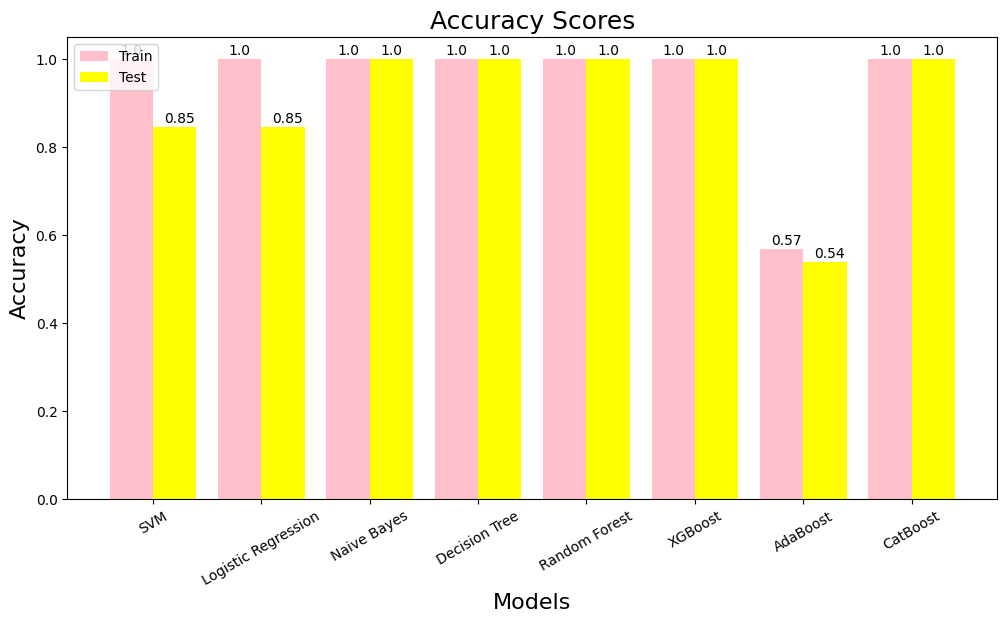

In [52]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=100)
x_pos = np.arange(len(df))
Model= ["SVM","Logistic Regression","Naive Bayes", "Decision Tree","Random Forest","XGBoost","AdaBoost","CatBoost"]
bar1 = plt.bar(x_pos - 0.2, data['Training Accuracy'], width=0.4, label='Train', color= "pink")
bar2 = plt.bar(x_pos + 0.2, data['Testing Accuracy'], width=0.4, label='Test', color= "yellow")

# Annotate bars with values
for i, v in enumerate(data['Training Accuracy']):
    plt.text(i - 0.3, v + 0.01, str(round(v, 2)), fontsize=10)

for i, v in enumerate(data['Testing Accuracy']):
    plt.text(i + 0.1, v + 0.01, str(round(v, 2)), fontsize=10)

plt.xticks(x_pos, Model)
plt.xlabel("Models", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy Scores", fontsize=18)
plt.xticks(rotation=30)
plt.legend()
plt.show()


#**Model Deployment**

In [53]:
import pickle

# Save the Catboost model to a pickle file
with open('model_NB.pkl', 'wb') as f:
    pickle.dump(model_NB, f)


In [54]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))